### Exp 2a
TEST EIT (basic/dual) on data "daily9"

In [1]:
base_path="../eit_basic_dual_unreduced_experiments/exp_2d" #Don't add '/' at start and end
T=660 #Training time period
C=10000 #Capital available
file="daily9" #Index_file
m=60 #Inital Size of Kernel
lbuck=20 #Size Of Buckets
pho=0.2 #Transaction Cost Proportion
lamda=1/(100*C) # lower_bound for capital invested in jth stock
nuh=0.35  # upper_bound
xii=1.2 # Limit for Tracking Error
k=100 #Cardinality constraint for stocks in portfolio
p=3 #If stock not selected in optimal soln in last p iters then it is to be dropped from kernel
f=12
w_return=10
w_risk=1000000
w_risk_down=1
x0_choice=2
#cj,cb are declared in script

In [2]:
import sys
from IPython.display import Image, display
sys.path.insert(0,"..")

In [3]:
from eit_basic_experiment import TestEitBasic
from eit_dual_exp import TestEitDual

### Basic

Running Linear Relaxation of EIT ...
/Users/ashish1610dhiman/data_projects/index_tracking_kgp/eit_paper/notebooks
Solving LP(EIT)
***************************************************
Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Sep  8 2020 

Starting solution of the Linear programming problem using Dual Simplex

Coin0506I Presolve 1818 (-1131) rows, 2574 (-1131) columns and 321976 (-3393) elements
Clp0014I Perturbing problem by 0.001% of 0.12638397 - largest nonzero change 0.00010720899 ( 103.40655%) - largest zero change 0.00010718529
Clp0000I Optimal - objective value 8.5936427
Coin0511I After Postsolve, objective 8.5936427, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 8.593642685 - 1377 iterations time 0.582, Presolve 0.05
***************************************************

Optimisation Status=0
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)
CPU times: user 206 ms, sys: 64.3 ms, total: 270 ms
Wall time: 18.7 s


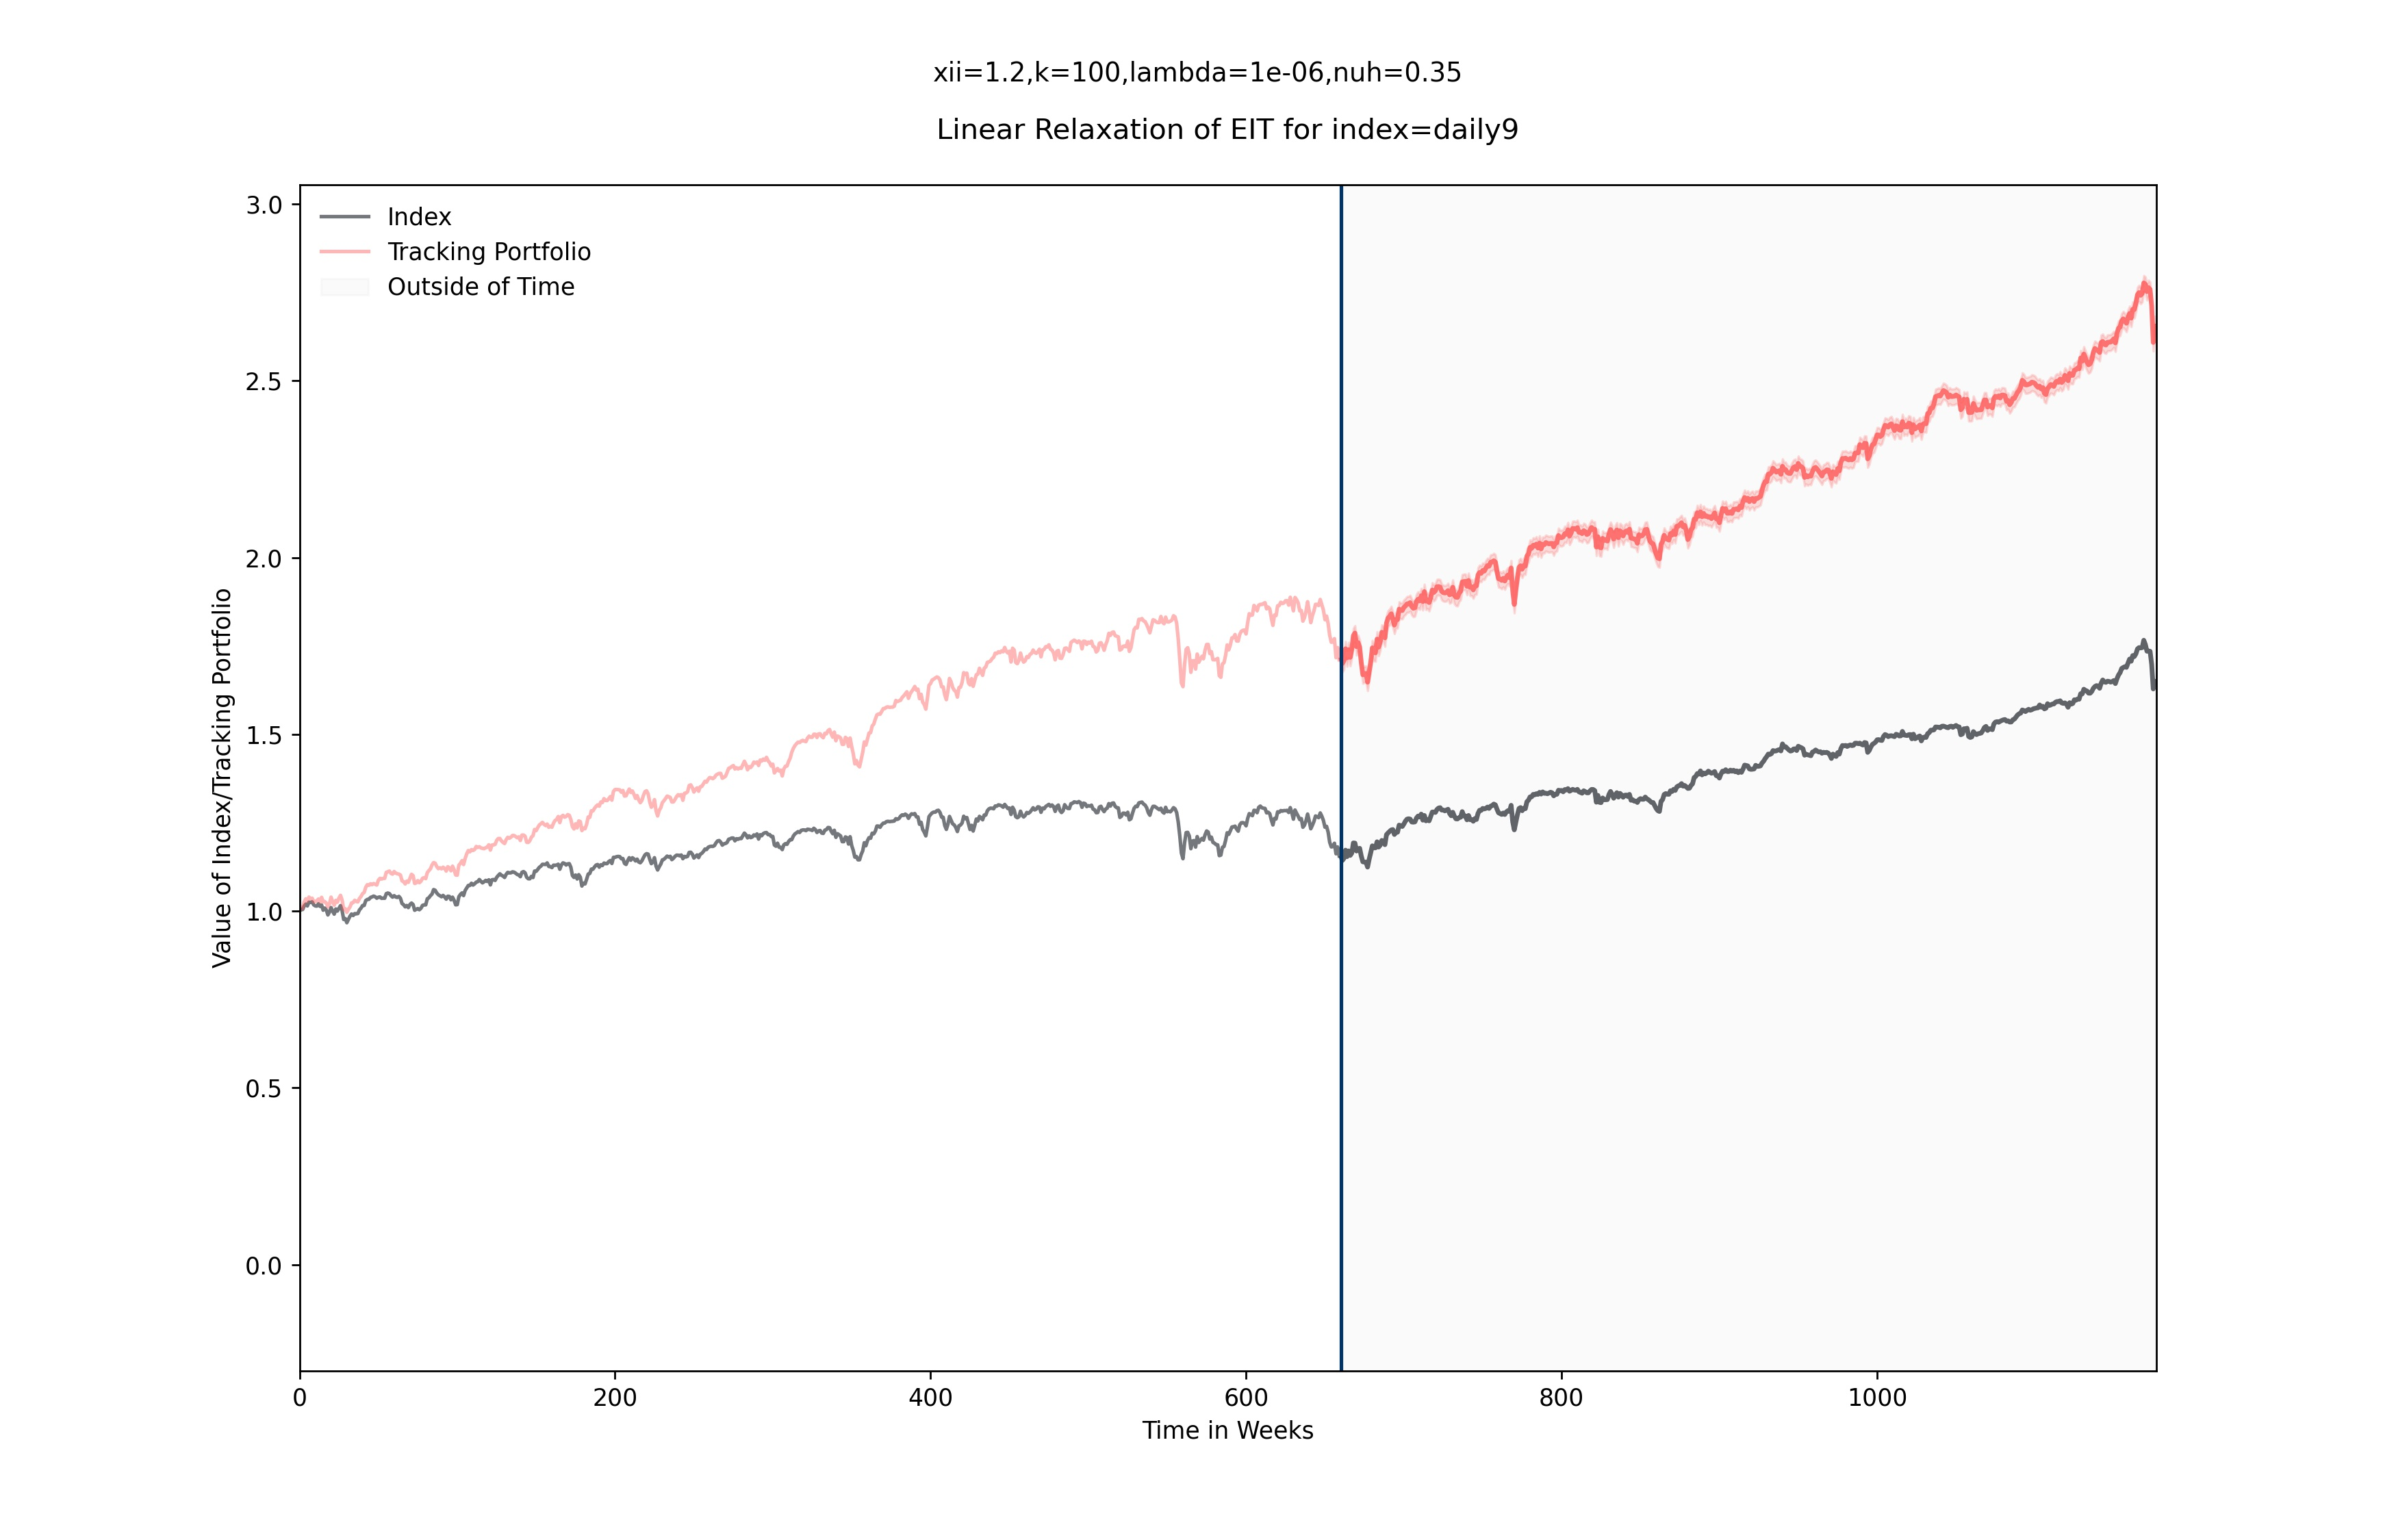

In [9]:
%%time
!python ../src/linear_relaxation.py $file $T $xii $k $pho $nuh $C $lamda $f $base_path

Image(filename=base_path+'/LP_EIT for index_{}.jpg'.format(file))

In [4]:
test_eit_basic=TestEitBasic(output=base_path,T=T,C=C,file=file,m=m,lbuck=lbuck,\
                                        pho=pho,lamda=lamda,nuh=nuh,xii=xii,k=k,p=p,f=f)
test_eit_basic.give_params()

params(output='../eit_basic_dual_unreduced_experiments/exp_2a', T=880, C=10000, file='daily9', m=60, lbuck=20, pho=0.2, lamda=1e-06, nuh=0.35, xii=1.2, k=100, p=3, f=12)

In [5]:
%%time
result=test_eit_basic.step_1(from_root=False,verbose=True)

+----------------------------------------------------+
    Step 1: Solving Linear Relaxation of EIT-Basic
+----------------------------------------------------+
+----------------------------------------------------+
    Step 1 complete in 24.90s
+----------------------------------------------------+
CPU times: user 5.83 ms, sys: 3.49 ms, total: 9.32 ms
Wall time: 24.9 s


In [6]:
result_2a=test_eit_basic.step_2a(result[0],result[1],result[2],from_root=False,verbose=True)

+----------------------------------------------------+
    Step 2a: Sort Securities and create buckets
+----------------------------------------------------+


/Users/ashish1610dhiman/opt/anaconda3/envs/eit_paper/lib/python3.8/site-packages/pulp/pulp.py:1198: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
../src/sort_and_buckets.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_optimal.sort_values(by="value",ascending=False,inplace=True)


In [7]:
result_2b=test_eit_basic.step_2b(kernel=result_2a[0], buckets=result_2a[1], from_root=False, verbose=True)

+----------------------------------------------------+
     Step 2b: Solve EIT(kernel) and get lower-bound
+----------------------------------------------------+
Solving EIT(kernel)
***************************************************
***************************************************

Optimisation Status=0,Objective Value=4.205079977246329
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)


In [8]:
result_3=test_eit_basic.step_3(kernel=result_2a[0], L=result_2a[2],z = result_2b[0],\
                              Nb=result_2a[3], buckets=result_2a[1],\
                              failure = result_2b[1],execution_result = result_2b[-1],from_root=False, verbose=True)

+----------------------------------------------------+
    Step 3: Execution Phase of Kernel Search
+----------------------------------------------------+


For bucket=1
Solving EIT(kernel+bucket-1)
***************************************************
Optimisation Status=OptimizationStatus.OPTIMAL,Objective Value=4.327531393469789
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)
Following stocks from bucket added to kernel:
security_130
security_6
security_33
security_38
security_193
security_331
security_423
security_229
security_190
security_322
security_59
security_197
security_88
security_22
security_375
security_67
security_386
security_433
security_449
security_142
***************************************************
Updating Lower Bound
Updating Kernel
Length of Old Kernel=60
Length of Updated Kernel=80
Current Length Kernel=80


For bucket=2
Solving EIT(kernel+bucket-2)
***************************************************
Optimisation Status=OptimizationStatus.OPTIMAL,Objective 

Removing security_316 from kernel
Removing security_115 from kernel
Current Length Kernel=107


In [9]:
%%time
%%capture
result_df=test_eit_basic.run_experiment(from_root=False,verbose=False);
result_df["z_linear"]=test_eit_basic.objective_linear

CPU times: user 12min 6s, sys: 10.3 s, total: 12min 16s
Wall time: 14min 6s


### Dual

Running Linear Relaxation of EIT ...with input args=14
/Users/ashish1610dhiman/data_projects/index_tracking_kgp/eit_paper/notebooks
Solving LP(EIT)
***************************************************
Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Sep  8 2020 

Starting solution of the Linear programming problem using Dual Simplex

Coin0506I Presolve 1817 (-1131) rows, 2574 (-1131) columns and 320656 (-3393) elements
Clp0014I Perturbing problem by 0.001% of 0.0005680116 - largest nonzero change 9.9802175e-05 ( 1444679.4%) - largest zero change 9.9780109e-05
Clp0006I 1215  Obj -49.120174 Primal inf 375747.45 (853)
Clp0006I 1804  Obj -72.150955 Primal inf 11762.774 (562)
Clp0000I Optimal - objective value -74.317155
Coin0511I After Postsolve, objective -74.317155, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -74.31715489 - 2101 iterations time 1.992, Presolve 0.04
***************************************************

Optimisation Status=0
OPTIMAL(0), ER

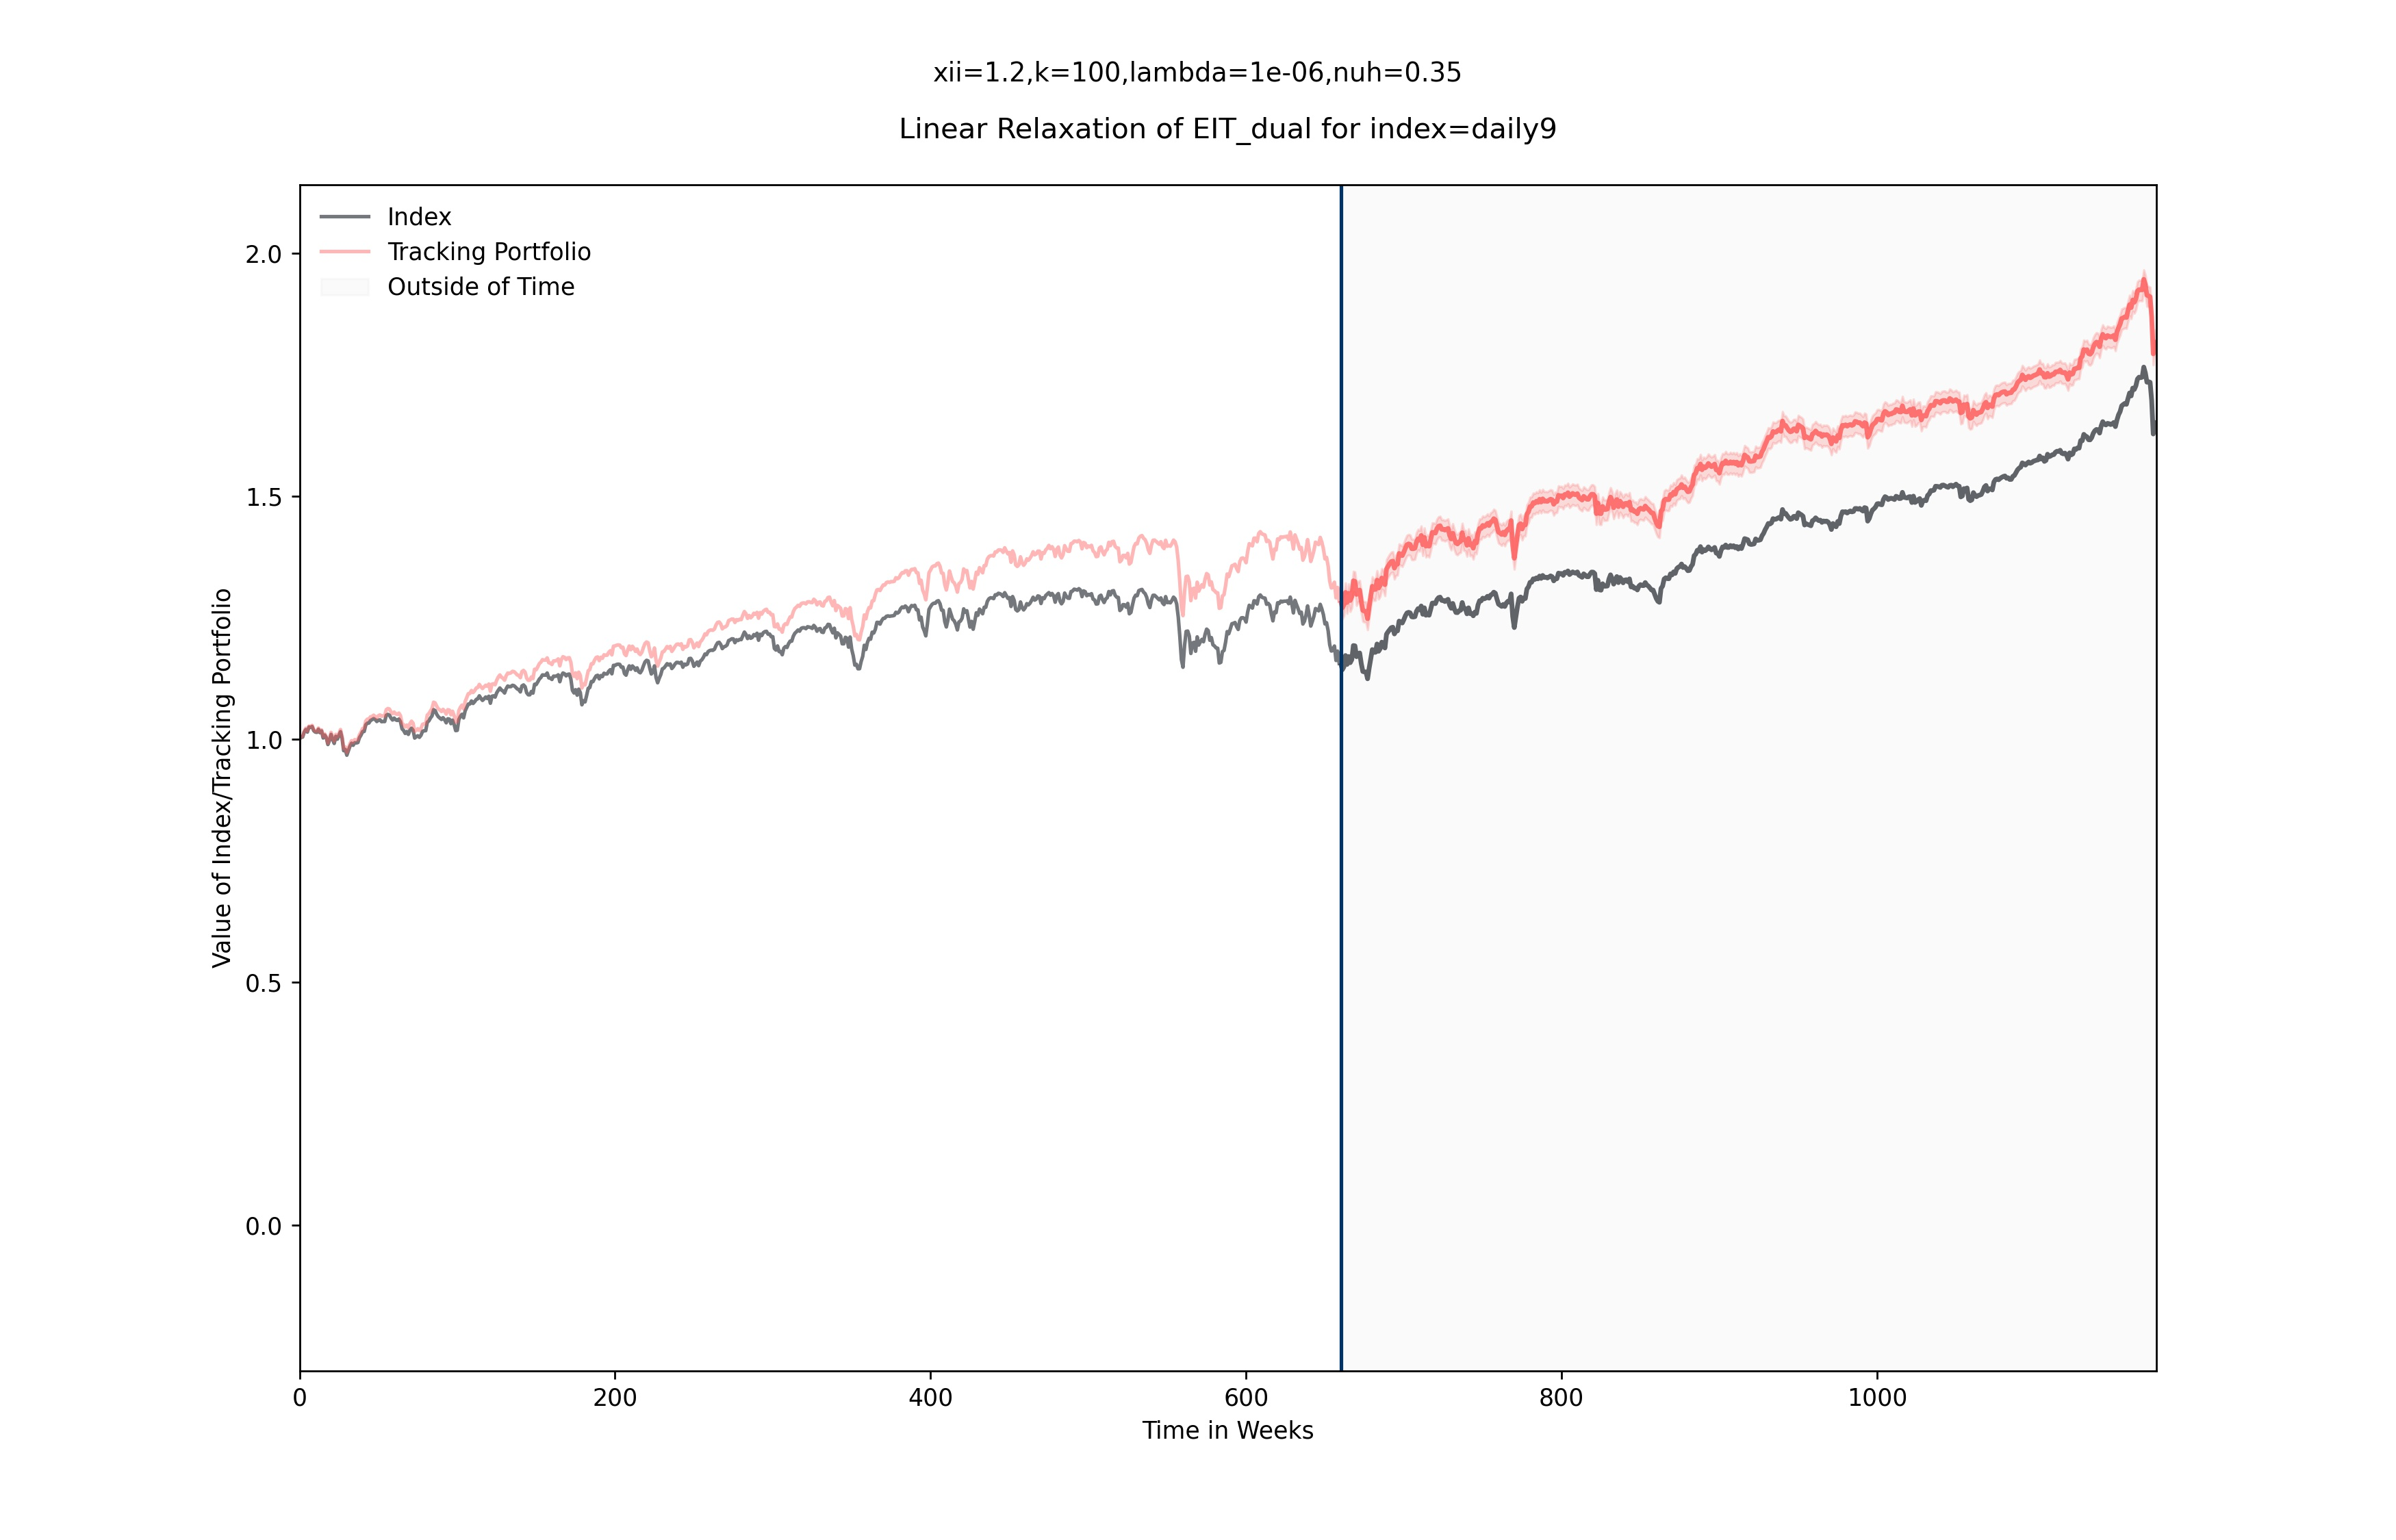

In [11]:
%%time
!python ../src_dual/linear_relaxation.py $file $T $xii $k $pho $nuh $C $lamda $f\
$w_return $w_risk $w_risk_down $base_path

Image(filename=base_path+'/LP_EIT_Dual for index_{}.jpg'.format(file))

In [13]:
test_eit_dual=TestEitDual(output=base_path,T=T,C=C,file=file,m=m,lbuck=lbuck,pho=pho,lamda=lamda,\
                          nuh=nuh,xii=xii,k=k,p=p,f=f,w_risk=w_risk,w_return=w_return,w_risk_down=w_risk_down)

In [8]:
test_eit_dual.give_params()

params(output='../eit_basic_dual_unreduced_experiments/exp_2b', T=880, C=10000, file='daily9', m=60, lbuck=20, pho=0.2, lamda=1e-06, nuh=0.35, xii=1.2, k=100, p=3, f=12, w_risk=10000, w_return=100, w_risk_down=1)

In [9]:
result=test_eit_dual.step_1(from_root=False,verbose=True)

+----------------------------------------------------+
    Step 1: Solving Linear Relaxation of EIT-Dual
+----------------------------------------------------+
+----------------------------------------------------+
    Step 1 complete in 30.12s
+----------------------------------------------------+


In [10]:
result[1]

-0.941723560351854

In [11]:
result_2a=test_eit_dual.step_2a(result[0],result[1],result[2],from_root=False,verbose=True)

+----------------------------------------------------+
    Step 2a: Sort Securities and create buckets
+----------------------------------------------------+


/Users/ashish1610dhiman/opt/anaconda3/envs/eit_paper/lib/python3.8/site-packages/pulp/pulp.py:1198: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
../src_dual/sort_and_buckets.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_optimal.sort_values(by="value", ascending=False, inplace=True)


In [12]:
result_2b=test_eit_dual.step_2b(kernel=result_2a[0], buckets=result_2a[1], from_root=False, verbose=True)

+----------------------------------------------------+
     Step 2b: Solve EIT(kernel) and get lower-bound
+----------------------------------------------------+
Solving EIT_Dual(kernel)
***************************************************
***************************************************

Optimisation Status=0,Objective Value=-14.379152897858766
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)


In [13]:
result_2b[1]

False

In [ ]:
result_3=test_eit_dual.step_3(kernel=result_2a[0], L=result_2a[2],z = result_2b[0],\
                              Nb=result_2a[3], buckets=result_2a[1],\
                              failure = result_2b[1],execution_result = result_2b[-1],from_root=False, verbose=True)

+----------------------------------------------------+
    Step 3: Execution Phase of Kernel Search
+----------------------------------------------------+


For bucket=1
Solving EIT(kernel+bucket-1)
***************************************************
Optimisation Status=OptimizationStatus.OPTIMAL,Objective Value=-7.688164517495183
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)
Following stocks from bucket added to kernel:
security_215
security_154
security_36
security_396
security_337
security_9
security_19
security_304
security_178
security_153
security_440
security_266
security_342
security_233
security_242
security_66
***************************************************
Updating Lower Bound
Updating Kernel
Length of Old Kernel=60
Length of Updated Kernel=76
Current Length Kernel=76


For bucket=2
Solving EIT(kernel+bucket-2)
***************************************************
Optimisation Status=OptimizationStatus.OPTIMAL,Objective Value=-5.561907986929095
OPTIMAL(0), ERROR(-1), 

In [4]:
base_path="../eit_basic_dual_unreduced_experiments/exp_2e" #Don't add '/' at start and end
T=800 #Training time period
C=10000 #Capital available
file="daily9" #Index_file
m=60 #Inital Size of Kernel
lbuck=10 #Size Of Buckets
pho=0.3 #Transaction Cost Proportion
lamda=1/(100*C) # lower_bound for capital invested in jth stock
nuh=0.35  # upper_bound
xii=1.2 # Limit for Tracking Error
k=100 #Cardinality constraint for stocks in portfolio
p=3 #If stock not selected in optimal soln in last p iters then it is to be dropped from kernel
f=12
w_return=100
w_risk=10000
w_risk_down=1
x0_choice=2
#cj,cb are declared in script

In [5]:
test_eit_dual=TestEitDual(output=base_path,T=T,C=C,file=file,m=m,lbuck=lbuck,pho=pho,lamda=lamda,\
                          nuh=nuh,xii=xii,k=k,p=p,f=f,w_risk=w_risk,w_return=w_return,w_risk_down=w_risk_down)

In [6]:
%%time
result_dual=test_eit_dual.run_experiment(from_root=False)

+----------------------------------------------------+
    Step 1: Solving Linear Relaxation of EIT-Dual
+----------------------------------------------------+
+----------------------------------------------------+
    Step 1 complete in 24.43s
+----------------------------------------------------+
+----------------------------------------------------+
    Step 2a: Sort Securities and create buckets
+----------------------------------------------------+


/Users/ashish1610dhiman/opt/anaconda3/envs/eit_paper/lib/python3.8/site-packages/pulp/pulp.py:1198: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
../src_dual/sort_and_buckets.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_optimal.sort_values(by="value", ascending=False, inplace=True)


+----------------------------------------------------+
     Step 2b: Solve EIT(kernel) and get lower-bound
+----------------------------------------------------+
Solving EIT_Dual(kernel)
***************************************************
***************************************************

Optimisation Status=0,Objective Value=-13.470936396176237
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)
+----------------------------------------------------+
    Step 3: Execution Phase of Kernel Search
+----------------------------------------------------+


For bucket=1
Solving EIT(kernel+bucket-1)
***************************************************
Optimisation Status=OptimizationStatus.FEASIBLE,Objective Value=-9.365356300252706
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)
Following stocks from bucket added to kernel:
security_176
security_313
security_82
security_339
security_390
security_337
security_8
security_40
***************************************************
Updating Lower B

Solving EIT(kernel+bucket-17)
***************************************************
Optimisation Status=OptimizationStatus.FEASIBLE,Objective Value=-3.3491187871921926
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)
Following stocks from bucket added to kernel:
security_34
security_254
security_321
security_464
security_459
***************************************************
Updating Lower Bound
Updating Kernel
Length of Old Kernel=117
Length of Updated Kernel=122
Removing security_426 from kernel
Removing security_313 from kernel
Removing security_110 from kernel
Removing security_51 from kernel
Removing security_350 from kernel
Removing security_248 from kernel
Current Length Kernel=116


For bucket=18
Solving EIT(kernel+bucket-18)
***************************************************
Optimisation Status=OptimizationStatus.NO_SOLUTION_FOUND,Objective Value=None
OPTIMAL(0), ERROR(-1), INFEASIBLE(1), UNBOUNDED(2)
Following stocks from bucket added to kernel:
****************************

KeyboardInterrupt: 

In [7]:
result_dual